# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

## CIRCUMFERENCE
Ho usato un range di 10000 temperature, per ogni temperatura ho compito 1000 step MC e ogni 10 step stampo quanto vale la cost function. Inoltre mostro anche un grafico di come varia la cost function al termine di ogni simulazione con temperatura fissa fatta

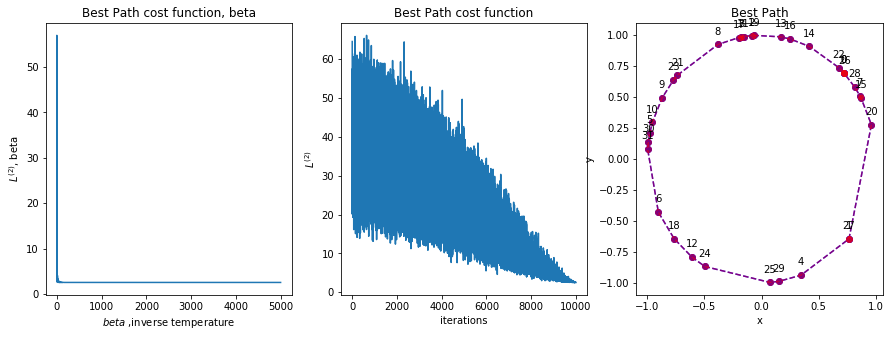

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


folder = "circumference/","square/"
name = "beta_path.txt","best_path.txt","picture_path.txt"
ylab = "$L^{(2)}$, beta","$L^{(2)}$","y"
title =  "Best Path cost function, beta","Best Path cost function","Best Path"
xlabel = "$beta$ ,inverse temperature","iterations"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for i in range(3):
    if i != 2:
        it = np.loadtxt(folder[0]+name[i],usecols=(0),unpack='true')
        y = np.loadtxt(folder[0]+name[i],usecols=(1),unpack='true')
        axs[i].plot(it,y)
        axs[i].set_xlabel(xlabel[i])
    else:
        x = np.loadtxt(folder[0]+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[0]+name[i],usecols=(2),unpack='true')
        n = np.loadtxt(folder[0]+name[i],dtype='int',usecols=(0),unpack='true')
        axs[i].plot(x,y,"--o",color='b')
        axs[i].set_xlabel("x")
        for xs,ys,ns in zip(x,y,n):
            label = f"{ns}"
            plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
        x = np.loadtxt(folder[0]+"circumference_GA/"+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[0]+"circumference_GA/"+name[i],usecols=(2),unpack='true')
        axs[i].plot(x,y,"--o",alpha=0.5,color='red')
    axs[i].set_ylabel(ylab[i])
    axs[i].set_title(title[i])
    
plt.show()

## SQUARE
Ho usato un range di 10000 temperature, per ogni temperatura ho compito 5000 step MC e ogni 10 step stampo quanto vale la cost function. Inoltre mostro anche un grafico di come varia la cost function al termine di ogni simulazione con temperatura fissa fatta

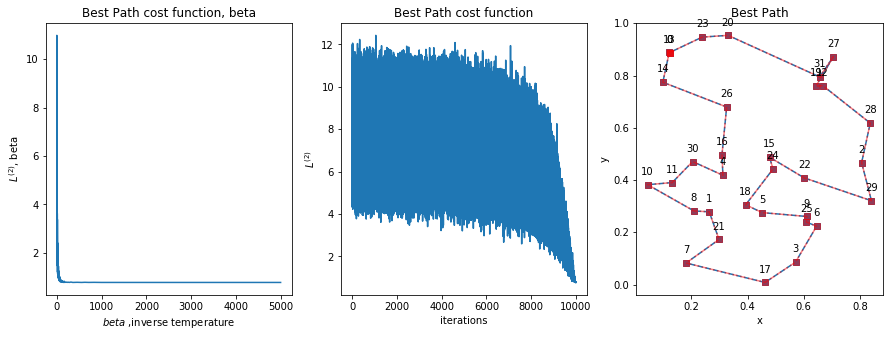

In [15]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for i in range(3):
    if i != 2:
        it = np.loadtxt(folder[1]+name[i],usecols=(0),unpack='true')
        y = np.loadtxt(folder[1]+name[i],usecols=(1),unpack='true')
        axs[i].plot(it,y)
        axs[i].set_xlabel(xlabel[i])
    else:
        x = np.loadtxt(folder[1]+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[1]+name[i],usecols=(2),unpack='true')
        n = np.loadtxt(folder[1]+name[i],dtype='int',usecols=(0),unpack='true')
        axs[i].plot(x,y,"--s")
        axs[i].set_xlabel("x")
        for xs,ys,ns in zip(x,y,n):
            label = f"{ns}"
            plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
        x = np.loadtxt(folder[1]+"square_GA/"+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[1]+"square_GA/"+name[i],usecols=(2),unpack='true')
        axs[i].plot(x,y,"--s",alpha=0.5,color='r')
    axs[i].set_ylabel(ylab[i])
    axs[i].set_title(title[i])
    
    
plt.show()

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

## CIRCUMFERENCE
Per ogni nodo sono stati compiuti 15'000 step (ricordo che per GA non parallelo ho usato 50'000 iterazioni)  
Parametri utilizzati:  
- population size = cities (32)
- $p_m = 0.2$ (come GA non parallelo)
- $p_c = 0.7$  (come GA non parallelo)
- $N_{migr} = 200$

esecution time T_4:  4.15211  sec
cost =  16.60844
SpeedUp =  2.20279327859811
Efficiency =  0.5506983196495275


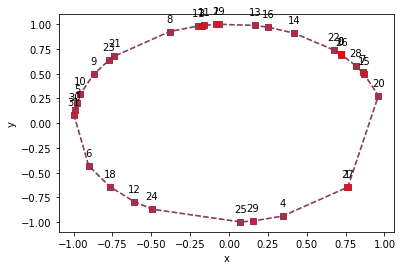

In [46]:
x = np.loadtxt("parallel_GA/"+folder[0]+"picture_final_path.txt",usecols=(1),unpack='true')
y = np.loadtxt("parallel_GA/"+folder[0]+"picture_final_path.txt",usecols=(2),unpack='true')
n = np.loadtxt("parallel_GA/"+folder[0]+"picture_final_path.txt",dtype='int',usecols=(0),unpack='true')
plt.plot(x,y,"--s")
plt.xlabel("x")
plt.ylabel("y")
for xs,ys,ns in zip(x,y,n):
    label = f"{ns}"
    plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
x = np.loadtxt(folder[0]+"circumference_GA/"+"picture_path.txt",usecols=(1),unpack='true')
y = np.loadtxt(folder[0]+"circumference_GA/"+"picture_path.txt",usecols=(2),unpack='true')
plt.plot(x,y,"--s",alpha=0.5,color='r')
    
time = np.loadtxt("parallel_GA/"+folder[0]+"parallel_GA_circumference.time",usecols=(0),unpack='true')
print("execution time T_4: ",time ," sec")
time1 = np.loadtxt("parallel_GA/"+folder[0]+"circumference.time",usecols=(0),unpack='true')

C_4 = 4*time
S_4 = time1/time
E_4 = time1/C_4

print("cost = ", C_4)
print("SpeedUp = ",S_4)
print("Efficiency = ",E_4)

plt.show()

## SQUARE
Per ogni nodo sono stati compiuti 20'000 step (ricordo che per GA non parallelo ho usato 50'000 iterazioni)  
Parametri utilizzati:  
- population size = cities (32)
- $p_m = 0.2$ (come GA non parallelo)
- $p_c = 0.7$  (come GA non parallelo)
- $N_{migr} = 200$

esecution time:  5.44759  sec
cost =  21.79036
SpeedUp =  1.6674015482075562
Efficiency =  0.41685038705188904


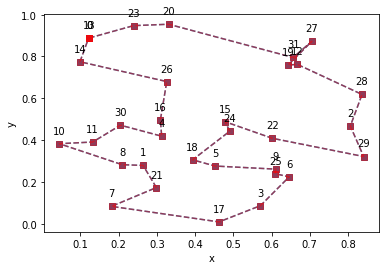

In [47]:
x = np.loadtxt("parallel_GA/"+folder[1]+"picture_final_path.txt",usecols=(1),unpack='true')
y = np.loadtxt("parallel_GA/"+folder[1]+"picture_final_path.txt",usecols=(2),unpack='true')
n = np.loadtxt("parallel_GA/"+folder[1]+"picture_final_path.txt",dtype='int',usecols=(0),unpack='true')
plt.plot(x,y,"--s")
plt.xlabel("x")
plt.ylabel("y")
for xs,ys,ns in zip(x,y,n):
    label = f"{ns}"
    plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
x = np.loadtxt(folder[1]+"square_GA/"+"picture_path.txt",usecols=(1),unpack='true')
y = np.loadtxt(folder[1]+"square_GA/"+"picture_path.txt",usecols=(2),unpack='true')
plt.plot(x,y,"--s",alpha=0.5,color='r')
    
time = np.loadtxt("parallel_GA/"+folder[1]+"parallel_GA_square.time",usecols=(0),unpack='true')
print("execution time: ",time ," sec")
time1 = np.loadtxt("parallel_GA/"+folder[1]+"square.time",usecols=(0),unpack='true')

C_4 = 4*time
S_4 = time1/time
E_4 = time1/C_4

print("cost = ", C_4)
print("SpeedUp = ",S_4)
print("Efficiency = ",E_4)

plt.show()